Four treatments (Capomulin, Infubinol, Ketapril, and Placebo)  for comparison.
tasked with:
* Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
* Creating a scatter plot that shows how the number of metastatic site changes over time for each treatment.
* Creating a scatter plot that shows the number of mice still alive through the course of treatment 
* Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.



#Observations:
1)	Ketapril actually does more harm than good.  The mice who received it did worse than the mice who received nothing.
2)	Capomulin is the only one of the four who reduced the tumor size, number of metastatic sites and had the best survival rate.
3)	Looking at all of the drugs, Ramicane was as successful as at Capomulin, and they are the only two in the entire study with positive results. 


In [1]:
# Dependencies

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
# Read data

trial_data = pd.read_csv("raw_data/clinicaltrial_data.csv")
mouse_data = pd.read_csv("raw_data/mouse_drug_data.csv")

In [3]:
#load the data into dataframes

trial_df=pd.DataFrame(trial_data)
mouse_df=pd.DataFrame(mouse_data)

In [4]:
#check for duplicate mouse data and clean it prior to merging the datasets

duplicates = mouse_df.set_index('Mouse ID').index.get_duplicates()
bad_mouse = duplicates[0]
clean_mice=mouse_df[mouse_df['Mouse ID'] != bad_mouse]
clean_trial=trial_df[trial_df['Mouse ID'] != bad_mouse]
dataset=pd.merge(clean_mice,clean_trial, on = "Mouse ID")
dataset.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [5]:
#table of tumer size over time per drug

tumor=dataset[['Mouse ID', 'Drug', 'Timepoint', 'Tumor Volume (mm3)']]
tumor_data=pd.pivot_table(tumor, index= ["Drug", "Timepoint"] )
tumor_data.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [6]:
#table of all drugs over timepoints
tumor_table=tumor.pivot_table( index= "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
tumor_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.462490,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.122548,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.103457,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [8]:
#This is where I set numerous counters and data that I will use for all charts and data, such as 
# set the x_axis, colors, makers, and xlim for the various scatter charts, and a list and number of drugs
x_axis = np.arange(0, 50, 5)
colors = ['red','blue','green','yellow','tan','pink','violet','skyblue','orange','aqua']
markers = ['o','v','^','>','<','1','2','3','4','8']    
plt.xlim(0,45)
drugs=dataset["Drug"].unique()
review_drugs=["Capomulin","Infubinol","Ketapril","Placebo"]
review_count=[0,1,2,3]
count = np.arange(0,len(drugs))
plt.style.use('seaborn-darkgrid')

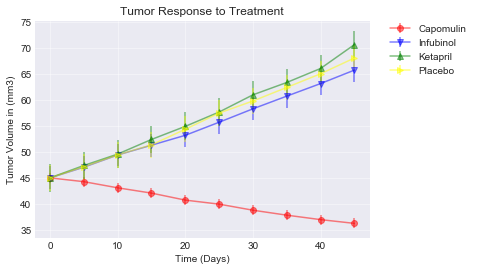

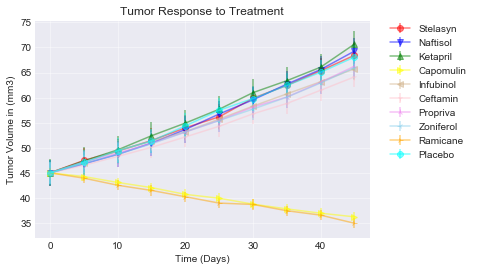

In [10]:
# First Chart of drug impact on tumors
plt.style.use('seaborn-darkgrid')
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume in (mm3)")
plt.grid(alpha = 0.5)
for i in review_count:
    chart_data = stats.sem(tumor_table[review_drugs[i]])
    plt.errorbar(x_axis, tumor_table[review_drugs[i]], yerr = chart_data, marker= markers[i], color= colors[i], alpha = 0.5, label = review_drugs[i])

plt.legend(bbox_to_anchor=(1.05,1),loc= 2, borderaxespad = 0.)
plt.show()

# Chart of all drugs impact on tumors
plt.style.use('seaborn-darkgrid')
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume in (mm3)")
plt.grid(alpha = 0.5)
for i in count:
    chart_data = stats.sem(tumor_table[drugs[i]])
    plt.errorbar(x_axis, tumor_table[drugs[i]], yerr = chart_data, marker= markers[i], color= colors[i], alpha = 0.5, label = drugs[i])

plt.legend(bbox_to_anchor=(1.05,1),loc= 2, borderaxespad = 0.)
plt.show()



In [11]:
# Metastatic Sites over time per drug

metastatic=dataset[['Mouse ID', 'Drug', 'Timepoint', 'Metastatic Sites']]
metastatic_data=pd.pivot_table(metastatic, index= ["Drug", "Timepoint"] )
metastatic_data.head(10)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190

In [12]:
#table of Metastatic results of all drugs over timepoints
metastatic_table=metastatic.pivot_table( index= "Timepoint", columns = "Drug", values = "Metastatic Sites")
metastatic_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.347826,0.120000,0.260870,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.619048,0.250000,0.523810,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.800000,0.333333,0.809524,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.947368,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.384615,0.652174,1.166667,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.666667,0.782609,1.411765,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.333333,0.952381,1.533333,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


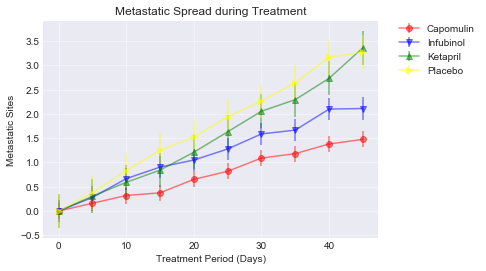

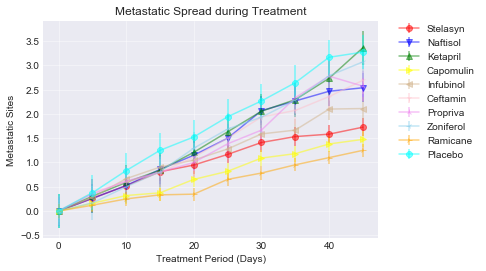

In [13]:
#Chart of Metastatic results for review drugs
plt.style.use('seaborn-darkgrid')
plt.title("Metastatic Spread during Treatment")
plt.xlabel("Treatment Period (Days)")
plt.ylabel("Metastatic Sites")
plt.grid(alpha = 0.5)
for i in review_count:
    chart_data = stats.sem(metastatic_table[review_drugs[i]])
    plt.errorbar(x_axis, metastatic_table[review_drugs[i]], yerr = chart_data, marker= markers[i], color= colors[i], alpha = 0.5, label = review_drugs[i])

plt.legend(bbox_to_anchor=(1.05,1),loc= 2, borderaxespad = 0.)
plt.show() 
#Chart of Metastatic results for all drugs
plt.style.use('seaborn-darkgrid')
plt.title("Metastatic Spread during Treatment")
plt.xlabel("Treatment Period (Days)")
plt.ylabel("Metastatic Sites")
plt.grid(alpha = 0.5)
for i in count:
    chart_data = stats.sem(metastatic_table[drugs[i]])
    plt.errorbar(x_axis, metastatic_table[drugs[i]], yerr = chart_data, marker= markers[i], color= colors[i], alpha = 0.5, label = drugs[i])

plt.legend(bbox_to_anchor=(1.05,1),loc= 2, borderaxespad = 0.)
plt.show()    

In [14]:
#subject mouse survival during the study
mice=dataset[['Mouse ID', 'Drug', 'Timepoint']]
mouse_count = mice.groupby(["Drug", "Timepoint"]).count()["Mouse ID"].rename("Mouse Count")
rodent_df=pd.DataFrame(mouse_count)
rodent_df.head(10)

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23
          25                  22
          30                  22
          35                  22
          40                  21
          45                  21

In [15]:
mouse_table=rodent_df.pivot_table( index= "Timepoint", columns = "Drug", values = "Mouse Count")
mouse_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,24,25,24,25
5,25,21,25,23,23,24,23,25,23,24
10,25,20,21,22,21,24,21,24,21,22
15,24,19,21,19,21,20,15,24,21,21
20,23,18,20,19,20,19,15,23,19,17
25,22,18,18,19,18,17,13,23,18,16
30,22,16,17,18,15,15,12,23,17,15
35,22,14,12,17,15,14,9,21,15,14
40,21,14,10,15,15,12,9,20,12,14


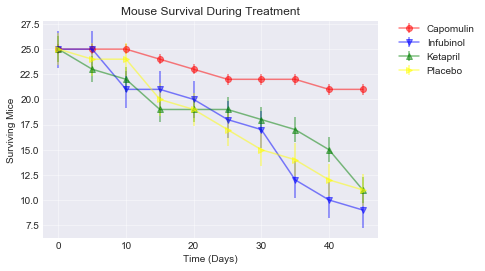

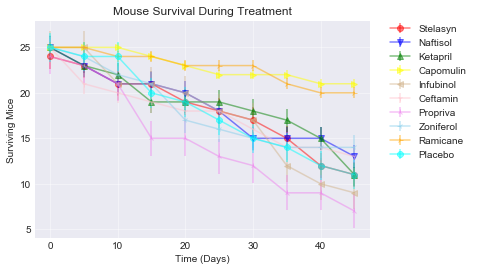

In [16]:
#chart of mouse survival rates per review drug
plt.style.use('seaborn-darkgrid')
plt.title("Mouse Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Surviving Mice")
plt.grid(alpha = 0.5)
for i in review_count:
    chart_data = stats.sem(mouse_table[review_drugs[i]])
    plt.errorbar(x_axis, mouse_table[review_drugs[i]], yerr = chart_data, marker= markers[i], color= colors[i], alpha = 0.5, label = review_drugs[i])

plt.legend(bbox_to_anchor=(1.05,1),loc= 2, borderaxespad = 0.)
plt.show() 

#chart of mouse survival rates per all drugs
plt.style.use('seaborn-darkgrid')
plt.title("Mouse Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Surviving Mice")
plt.grid(alpha = 0.5)
for i in count:
    chart_data = stats.sem(mouse_table[drugs[i]])
    plt.errorbar(x_axis, mouse_table[drugs[i]], yerr = chart_data, marker= markers[i], color= colors[i], alpha = 0.5, label = drugs[i])

plt.legend(bbox_to_anchor=(1.05,1),loc= 2, borderaxespad = 0.)
plt.show() 


In [17]:
#rate of change for each drug
drugdelta=tumor_table.pct_change(periods=9).dropna()
percent_change = round(drugdelta * 100, 2)
percent_change

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
45,-19.48,42.52,46.12,57.03,53.92,51.3,47.24,-22.32,52.09,46.58


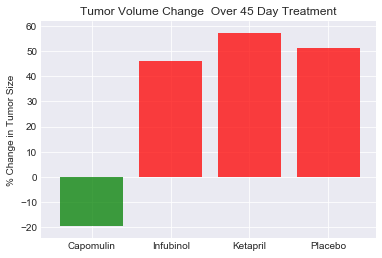

In [18]:
# create the bar chart of tumor shrinkage in reviewed drugs
plt.style.use('seaborn-darkgrid')
performance = {}
for x in review_count:
    performance[review_drugs[x]] = float(percent_change[review_drugs[x]])

x_axis = np.arange(0, len(review_drugs) )
tick_locations = []
for x in x_axis:
    tick_locations.append(x + 0.4)
plt.xlim(-0.25, len(review_drugs))
plt.ylim(min(performance.values()) - 5, max(performance.values()) + 5)
plt.title("Tumor Volume Change  Over 45 Day Treatment")
plt.ylabel("% Change in Tumor Size")

bar_colors = pd.Series(list(performance.values()))
bar_colors = bar_colors > 0
bar_colors = bar_colors.map({True: "Red", False: "Green"})
plt.xticks(tick_locations, performance)
plt.bar(x_axis, performance.values(), color =bar_colors, alpha=0.75, align="edge")
plt.show()

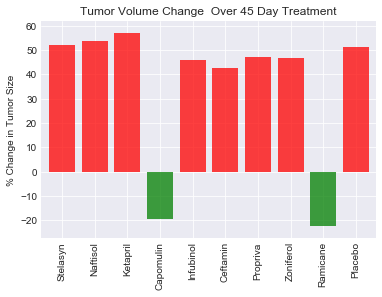

In [19]:
# create the bar chart of tumor shrinkage in all drugs
plt.style.use('seaborn-darkgrid')
performance = {}
for x in count:
    performance[drugs[x]] = float(percent_change[drugs[x]])

x_axis = np.arange(0, len(drugs))
tick_locations = []
for x in x_axis:
    tick_locations.append(x + 0.4)
plt.xlim(-0.25, len(drugs))
plt.ylim(min(performance.values()) - 5, max(performance.values()) + 5)
plt.title("Tumor Volume Change  Over 45 Day Treatment")
plt.ylabel("% Change in Tumor Size")

bar_colors = pd.Series(list(performance.values()))
bar_colors = bar_colors > 0
bar_colors = bar_colors.map({True: "Red", False: "Green"})
plt.xticks(tick_locations, performance, rotation="vertical" )
plt.bar(x_axis, performance.values(), color =bar_colors, alpha=0.75, align="edge")
plt.show()